In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
with open('./mesh2d.dat') as file:
    for i,line in enumerate(file):
        if i == 0:
            print("Reading the data!")
        if i == 1:
            str_line = re.split('\s+', line)
            m, n = int(str_line[3]), int(str_line[5])
            x = np.zeros(shape=(m, n))
            y = np.zeros(shape=(m, n))
        if i > 1:
            loc_0, loc_1 = divmod(i - 2, m) # 获取存储位置
            _, str1, str2, _ = re.split('\s+', line)
            x[m - loc_1 - 1, n - loc_0 - 1] = float(str1)
            y[m - loc_1 - 1, n - loc_0 - 1] = float(str2)
    print("Reading complete!")  

Reading the data!
Reading complete!


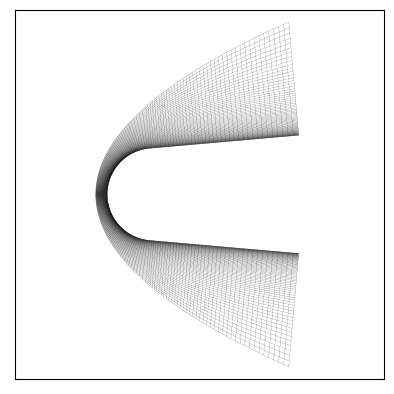

In [3]:
# 绘制网格
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

m, n = x.shape
for i in range(m):
    ax.plot(x[i, :], y[i, :], 'k', linewidth=0.1)
for i in range(n):
    ax.plot(x[:, i], y[:, i], 'k', linewidth=0.1)
ax.set_aspect(1)
ax.set_xlim(-3, 5)
ax.set_ylim(-4, 4)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

In [72]:
def _get_area(x, y):
    s1 =(x[0:-1, 1:] - x[0:-1, 0:-1]) * (y[1:, 1:] - y[0:-1,0:-1]) - (x[1:, 1:]
     - x[0:-1, 0:-1]) * (y[0:-1, 1:] -y[0:-1, 0:-1])
    s2 = (x[1:, 0:-1] - x[0:-1, 0:-1]) * (y[1:, 1:] - y[0:-1, 0:-1]) - (x[1:, 1:] - x[0:-1, 0:-1]) * (y[1:, 0:-1] - y[0:-1, 0:-1]) 
    s = 0.5 * np.abs(s1) + 0.5 * np.abs(s2)
    return s

In [73]:
s = _get_area(x, y)

In [78]:
s.min()

1.273013526315633e-05

In [77]:
a = np.array([[0, 1], [0, 1]])
b = np.array([[1, 1], [-1, -1]])
_get_area(a, b)

array([[2.]])

In [75]:
_get_area(x[119:121, 2:4],y[119:121, 2:4])

array([[2.55055867e-05]])

In [66]:
def area(x1, x2, x3, x4, y1, y2, y3, y4):
    s1 = x1 * y2 + x2 * y3 + x3 * y4 + x4 * y1
    s2 = y1 * x2 + y2 * x3 + y3 * x4 + y4 * x1
    print(s1)
    print(s2)
    print(s1 - s2)

In [70]:
area(0, 1, 1, 0, 1, 1, -1, -1)

-2
2
-4


In [76]:

np.savetxt("./vert.txt", s,delimiter=',')